# Data Reading Files

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics


In [7]:
!pip install xlrd>=2.0.1

In [3]:
# henter/læser filen som path
df = pd.read_excel(r"C:\Users\denso\OneDrive\Skrivebord\Titanic.xls")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [17]:
# hvis vi skal se det hele filen som vi har ovenover, så skal vi gør følgende, ved default kan man se førte og sidste 5
pd.set_option('display.max.rows', 1309)

In [19]:
# her har vi info om vores fil.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [21]:
# her har vi info om hvor mange rækker og kolonner vi har
df.shape

(1309, 14)

In [24]:
# her kan vi se info om kolonnerne 
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [28]:
# her kan vi får det som en liste
list(df)

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [31]:
# info om første 10 kolonner
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [ ]:
# info om første 10 kolonner
df.tail(10)

# Filtering and Ordering

In [ ]:
# på den både kan vi får info om en bestemt kolonne 
df['sex']

In [39]:
# her filtre vi efter alder
df[df['age'] <= 50]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
10,1,0,"Astor, Col. John Jacob",male,47.0000,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"


In [46]:
# her filtere jeg efter en bestem kolonne og en bestem betingelse
filter_homeDest = [ 'Lakewood, NJ', 'New York, NY' ]

df[df['home.dest'].isin(filter_homeDest)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
22,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY"
47,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S,5,NaN,"New York, NY"
51,1,0,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,NaN,NaN,"New York, NY"
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [53]:
# Fjern rækker med manglende værdier i 'home.dest' kolonnen (vores data er ikke clean endnu)
df_filtered = df.dropna(subset=['home.dest'])

# filtrering baseret på 'New York, NY' chekker vi får om vores kolonne indeholder den værdi som vi giver
df_ny = df_filtered[df_filtered['home.dest'].str.contains('New York, NY')]

df_ny

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
10,1,0,"Astor, Col. John Jacob",male,47.00,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.00,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.00,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
22,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY"
47,1,1,"Calderhead, Mr. Edward Pennington",male,42.00,0,0,PC 17476,26.2875,E24,S,5,NaN,"New York, NY"
51,1,0,"Carlsson, Mr. Frans Olof",male,33.00,0,0,695,5.0000,B51 B53 B55,S,NaN,NaN,"New York, NY"
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [54]:
# vi setter home.dest som index værdi
dfa = df.set_index('home.dest')
dfa

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
home.dest,,,,,,,,,,,,,
"St Louis, MO",1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN
"Montreal, PQ / Chesterville, ON",1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN
"Montreal, PQ / Chesterville, ON",1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN
"Montreal, PQ / Chesterville, ON",1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0
"Montreal, PQ / Chesterville, ON",1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN
"New York, NY",1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN
"Hudson, NY",1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN
"Belfast, NI",1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN
"Bayside, Queens, NY",1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN


In [60]:
#axis=0 ville henvise til rækker (lodret).
#axis=1 henvise til kolonner (vandret).
dfa.filter(items = ['name', 'sex'], axis = 1)

,name,sex
home.dest,,
"St Louis, MO","Allen, Miss. Elisabeth Walton",female
"Montreal, PQ / Chesterville, ON","Allison, Master. Hudson Trevor",male
"Montreal, PQ / Chesterville, ON","Allison, Miss. Helen Loraine",female
"Montreal, PQ / Chesterville, ON","Allison, Mr. Hudson Joshua Creighton",male
"Montreal, PQ / Chesterville, ON","Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female
"New York, NY","Anderson, Mr. Harry",male
"Hudson, NY","Andrews, Miss. Kornelia Theodosia",female
"Belfast, NI","Andrews, Mr. Thomas Jr",male
"Bayside, Queens, NY","Appleton, Mrs. Edward Dale (Charlotte Lamson)",female


In [61]:
# vi definere vi vil filter alt det har New i sig
dfa.filter(like = 'New', axis = 0)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
home.dest,,,,,,,,,,,,,
"New York, NY",1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN
"New York, NY",1,0,"Astor, Col. John Jacob",male,47.00,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0
"New York, NY",1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C,4,NaN
"New York, NY",1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN
"New York, NY",1,1,"Beckwith, Mr. Richard Leonard",male,37.00,1,1,11751,52.5542,D35,S,5,NaN
"New York, NY",1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.00,1,1,11751,52.5542,D35,S,5,NaN
"New York, NY",1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,5,NaN
"New York, NY",1,1,"Calderhead, Mr. Edward Pennington",male,42.00,0,0,PC 17476,26.2875,E24,S,5,NaN
"New York, NY",1,0,"Carlsson, Mr. Frans Olof",male,33.00,0,0,695,5.0000,B51 B53 B55,S,NaN,NaN


In [74]:
# loc refererer jeg til rækker og kolonner ved deres faktiske etiketter.
df.loc[:, ['name']] # den her måde får vi lidt bedre liste al a boostrap
#her får vi en liste al a pandas
# df['name']


,name
0,"Allen, Miss. Elisabeth Walton"
1,"Allison, Master. Hudson Trevor"
2,"Allison, Miss. Helen Loraine"
3,"Allison, Mr. Hudson Joshua Creighton"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
5,"Anderson, Mr. Harry"
6,"Andrews, Miss. Kornelia Theodosia"
7,"Andrews, Mr. Thomas Jr"
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)"
9,"Artagaveytia, Mr. Ramon"


In [75]:
# hvis vi vil finde ud af hvilket info en index indeholder, kan vi angive det således:
df.loc[2, 'name']


'Allison, Miss. Helen Loraine'

In [76]:
#iloc, refererer du til rækker og kolonner ved deres numeriske placering.dvs alt info den index indeholder

df.iloc[1] 

pclass                                     1
survived                                   1
name          Allison, Master. Hudson Trevor
sex                                     male
age                                   0.9167
sibsp                                      1
parch                                      2
ticket                                113781
fare                                  151.55
cabin                                C22 C26
embarked                                   S
boat                                      11
body                                     NaN
home.dest    Montreal, PQ / Chesterville, ON
Name: 1, dtype: object

# Data Cleaning

In [32]:
# finde antallet af manglende værdier i hver kolonne i din DataFrame.
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [33]:
# fjerne bestemte kolonner ('body', 'cabin', 'boat') fra din DataFrame 'df'
df = df.drop(['body', 'cabin', 'boat'], axis=1)

In [34]:
# nu kan vi tjek om den ren faktisk har fjerne det den skulle, gammle værdi er var (1309, 14)
df.shape

(1309, 11)

In [35]:
# fjerne duplikater fra filen
df = df.drop_duplicates()
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,NaN


In [36]:
# håndtere manglende værdier i en numerisk kolonne ved at erstatte dem med gennemsnitsværdien. for at undgå fejl i analyser eller modellering,
mean_age=df.age.mean()
df['age']= df['age'].fillna(mean_age)

In [37]:
#  bruges til at tælle antallet af ikke-manglende (ikke-NaN) værdier i hver kolonne
df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1309
sibsp        1309
parch        1309
ticket       1309
fare         1308
embarked     1307
home.dest     745
dtype: int64

In [38]:
# Udfyld manglende værdier i kolonnen 'home.dest' med "NA"
df["home.dest"] = df["home.dest"].fillna("NA")

# Vis de første rækker af DataFrame efter udfyldning
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [39]:
#bruges til at tælle antallet af manglende værdier i hver kolonne
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         1
embarked     2
home.dest    0
dtype: int64

In [40]:
# Beregn den gennemsnitlige billetpris
mean_fare = df.fare.mean()
mean_fare

33.29547928134557

In [41]:
# Udfyld manglende værdier i 'fare'-kolonnen med den gennemsnitlige billetpris som vi har regnet ovenover
df['fare'] = df['fare'].fillna(mean_fare)

In [42]:
## Beregn modalværdien for 'embarked'-kolonnen
mode_emb = df.embarked.mode()
mode_emb

0    S
Name: embarked, dtype: object

In [43]:
# Udfyld manglende værdier i 'embarked'-kolonnen med 'S'
df['embarked'] = df['embarked'].fillna('S')

In [44]:
# transform, her konventer vi string værdierne til integer, for gør det nemmer data til maskinlæringsmodeller
def preprocessor(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df['sex'] = le.fit_transform(df['sex'])
    processed_df['embarked'] = le.fit_transform(df['embarked'])
    processed_df = processed_df.drop(['name','ticket','home.dest'], axis=1)
    return processed_df

In [45]:
dfp = preprocessor(df)

In [46]:
#: Viser de første fem rækker af den forbehandlede DataFrame 
dfp.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


In [47]:
# antallet af rækker og kolonner som
dfp.shape

(1309, 8)

In [51]:
#dfa = np.nan_to_num(dfp)

In [57]:
# Tjek om der er uendelige eller NaN-værdier i DataFrame'en
any_inf_nan_values = dfp.isin([np.inf, -np.inf, np.nan]).any().any()

print("Er der nogen uendelige eller NaN-værdier?", any_inf_nan_values)

Er der nogen uendelige eller NaN-værdier? False


In [53]:
# Tjek om der er NaN-værdier i DataFrame'en
any_nan_values = dfp.isna().any().any()

# Vis resultatet
print("Er der nogen NaN-værdier?", any_nan_values)

Er der nogen NaN-værdier? False


In [54]:
# Tjek om der er NaN-værdier i DataFrame'en, og vis hvor de er
nan_locations = dfp.isna()
print("NaN-værdier i DataFrame'en:")
print(nan_locations)

NaN-værdier i DataFrame'en:
      pclass  survived    sex    age  sibsp  parch   fare  embarked
0      False     False  False  False  False  False  False     False
1      False     False  False  False  False  False  False     False
2      False     False  False  False  False  False  False     False
3      False     False  False  False  False  False  False     False
4      False     False  False  False  False  False  False     False
...      ...       ...    ...    ...    ...    ...    ...       ...
1304   False     False  False  False  False  False  False     False
1305   False     False  False  False  False  False  False     False
1306   False     False  False  False  False  False  False     False
1307   False     False  False  False  False  False  False     False
1308   False     False  False  False  False  False  False     False

[1309 rows x 8 columns]


In [56]:
any_nan_values = nan_locations.any().any()
print("Er der nogen NaN-værdier?", any_nan_values)

Er der nogen NaN-værdier? False


## 3) Analise the cleaning operations you have experienced there, in terms of:

### a. What type of error have been checked for?:
1. Missing values in different columns. These where identitfyed by: 
```python
df.isnull().sum()
```
2. These columns with high number of missing data in ('body', 'cabin', 'boat') where drop do to being less informativ.

### b. Has this type of error been found?
1. Yes it has, missing values there wasn't of a high volum were 'age', 'home.dest', 'fare', and 'embarked'.
2. High missing values there were founded: 'body', 'cabin', and 'boat'.
   
### c. If it has been found, how it has been recovered?
1. Missing values in 'age' & 'fare' were recovered by filling in mean.
2. 'home.dest filled in with 'NA'.
3. Missing 'embarked' filled in with mode ('S') do to most commen/used.
4. High number of missing values ('body', 'cabin', 'boat') were dropped
### d. Do you suggest any other alternative way of data reparation?
1. 'age' & 'fare' insted of mean could have static value as 0 or have vaule set to null
2. 'home.dest' - An alternativ to 'NA' could be consider imputing based on other available data
3. 'embarked' only missing 2 null values, mode has to be the best in this case, if the number was higher, then it could have been, convented to other data type.
4. ('body', 'cabin', 'boat') do to high number of missing values, the best would br to just drop.

 # Create a table in MS excel:

In [60]:
ett = pd.read_excel("C:\\Users\\denso\\OneDrive\\Skrivebord\\Python\\error_table_titanic.xlsx", index_col=None, na_values=['NA'])


In [61]:
ett.head()

,Error Type,Found or Not\n (True/False),Solution Applied,Another Possible Solution
0,Missing 'age',True,Filled with mean age,Insted of mean could have static value as 0 or...
1,Missing 'home.dest',True,Filled with 'NA',An alternativ to 'NA' could be consider imputi...
2,Missing 'fare',True,Filled with mean fare,Insted of mean could have static value as 0 or...
3,Missing 'embarked',True,Filled with mode ('S'),"Only missing 2 null values, mode has to be th..."
4,High missing values,True,"Columns dropped \n('body', 'cabin', 'boat')","Do to high number of missing values, the best ..."


# Data Exploration

In [62]:
# returnerer det en Pandas Serie, hvor indekset repræsenterer kolonnenavnene, og værdierne repræsenterer datatypen for hver kolonne.
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
embarked      object
home.dest     object
dtype: object

In [63]:
# generere en samlet statistisk beskrivelse af numeriske kolonner i en DataFrame
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,12.883199,1.041658,0.865560,51.738879
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


# Mål for central tendens

In [65]:
# Beregn gennemsnittet af 'age'-kolonnen i DataFrame'en 'df' (bruger NumPy)
np.mean(df.age)

29.881134512428297

In [66]:
# Gruppér DataFrame'en efter 'pclass' og beregn gennemsnittet af 'age' for hver gruppe
average_age_by_class = df.groupby("pclass")["age"].mean()
df.groupby("pclass")["age"].mean()

pclass
1    38.039569
2    29.528333
3    26.302223
Name: age, dtype: float64

In [70]:
# Beregn den vægtede gennemsnitlige alder baseret på 'pclass' i DataFrame'en 'df'
x=np.average(df.age, weights=df.pclass)
print(x)

28.159222765025856


In [71]:
# SciPy til at beregne det beskårne (trimmede) gennemsnit af alderen i DataFrame'en df
from scipy import stats as st
st.trim_mean(df.age, 0.1)

29.37868291398345

### Measures of Variability

In [72]:
 # Beregn standardafvigelsen af 'age'Standardafvigelsen er en måling af, hvor meget individuelle værdier afviger fra gennemsnittet.
df.age.std()

12.883199043445334

In [73]:
 # Beregn interkvartilafstanden (IQR) for 'age' ( aldersmæssige variation mellem den 25. percentil og 75. percentil er 13 år.)
df.age.quantile(0.75) - df.age.quantile(0.25)

13.0

In [74]:
# Beregn kvantilerne for 'age dvs hvordan aldersdataene fordeles
df.age.quantile([0.05, 0.25, 0.50, 0.75, 0.95])

0.05     7.400000
0.25    22.000000
0.50    29.881135
0.75    35.000000
0.95    55.000000
Name: age, dtype: float64

## Plotting

### Box Plot

<Axes: >

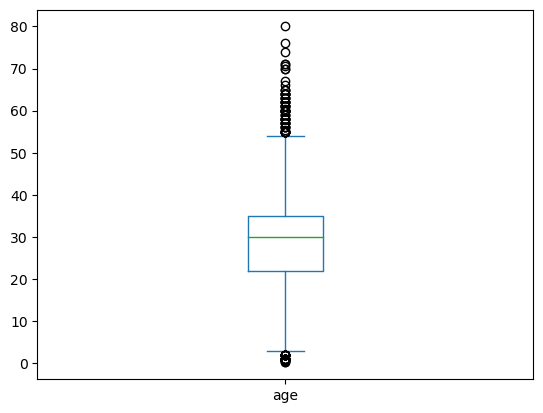

In [75]:
# En boxplot giver en visuel repræsentation af fordelingen af data, herunder kvartiler, median og eventuelle outliers.
df.age.plot.box()

<Axes: title={'center': 'age'}, xlabel='embarked'>

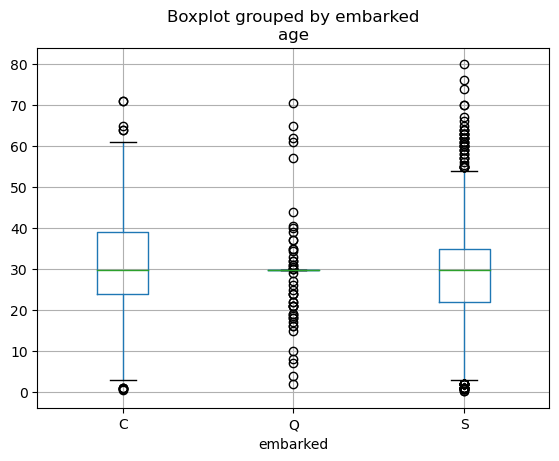

In [76]:
# # Generer en gruppevist boxplot for 'age' opdelt efter 'embarked' boxplot viser fordelingen af alderen for passagerer, der har taget skibet fra forskellige havne (embarked). 
df.boxplot(by='embarked', column='age')

### Histogram

<Axes: ylabel='Frequency'>

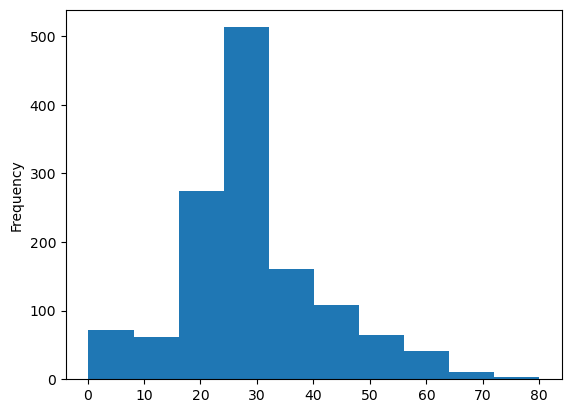

In [77]:
# Generer et histogram for 'age'
df.age.plot.hist()

### Density Plot

<Axes: ylabel='Density'>

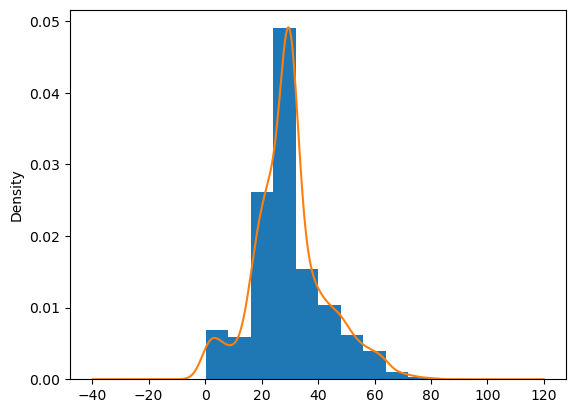

In [78]:
# Generer et normaliseret histogram for 'age' (KDE plot) bliver en kontinuert kurve genereret for at estimere sandsynlighhedenstætheden af alderen.
df.age.plot.hist(density=True)
df.age.plot.density()

### Bar Charts

<Axes: xlabel='embarked'>

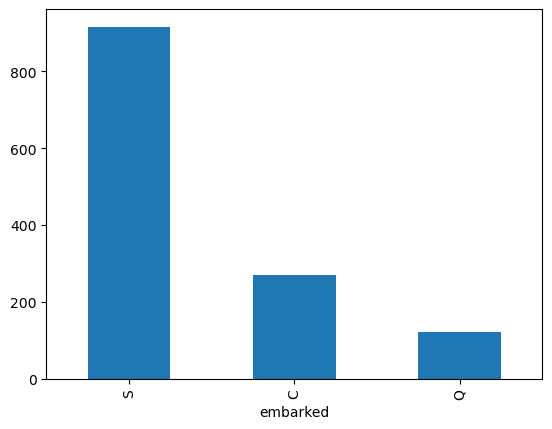

In [79]:
# Generer et søjlediagram for antallet af observationer for hver unik værdi i 'embarked' n visuel repræsentation af fordelingen af påstigningshavne i datasættet.
df['embarked'].value_counts().plot(kind='bar')

<Axes: xlabel='survived'>

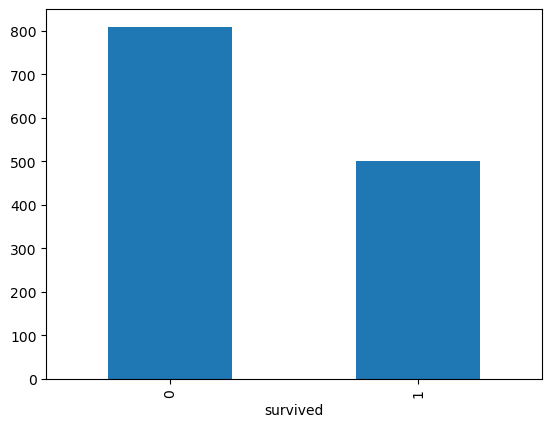

In [80]:
# Dette diagram giver en visuel repræsentation af fordelingen af overlevelsesstatus i datasættet.hvor 0 kan repræsentere døde og 1 overlevende
df['survived'].value_counts().plot(kind='bar')

### Scatterplot

<Axes: xlabel='fare', ylabel='age'>

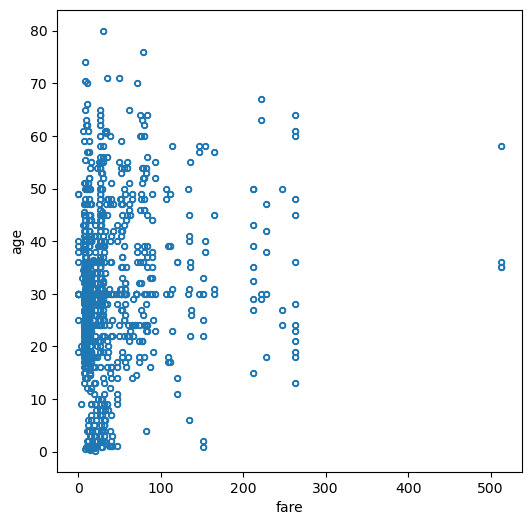

In [81]:
 # Scatterplottet giver dig en visuel repræsentation af, hvordan 'fare (billetpris)' og 'age' forholder sig til hinanden i datasættet
df.plot.scatter(x='fare', y='age', figsize=(6, 6), marker = '$\u25EF$')

<Axes: xlabel='age', ylabel='Density'>

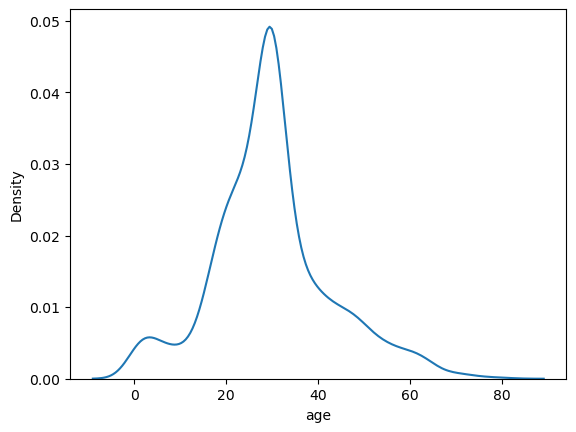

In [82]:
#Dette plot giver en mere glat repræsentation af fordelingen af aldersdataene 
sns.kdeplot(df.age)

### Violin Plot

<Axes: xlabel='embarked', ylabel='age'>

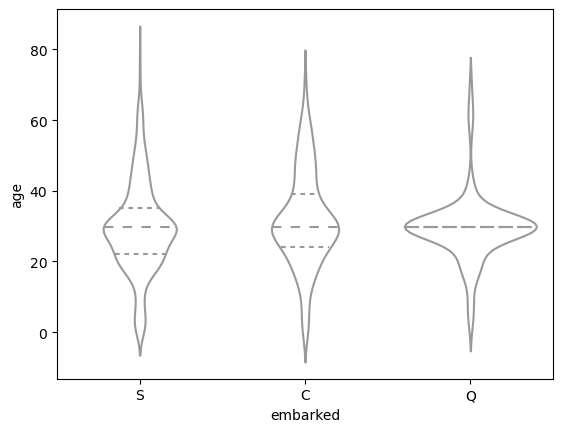

In [84]:
## Generer et violinplot for fordelingen af alderen opdelt efter 'embarked' hver "violin" repræsenterer fordelingen af aldersdataene for den pågældende gruppe
#sns.violinplot(df.embarked, df.age, inner="quartile", color="white")
sns.violinplot(x=df.embarked, y=df.age, inner="quartile", color="white")


### Contour Plot

## Correlation

In [86]:
#corrmat = df.corr()
#corrmat

#  analysere, hvordan forskellige variabler i datasættet korrelerer med hinanden.dvs fesk har alder noget gør med overlevelsen
# Fjern kolonner med ikke-numeriske data
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df[numerical_columns]

# Beregn korrelationsmatricen
corrmat = numerical_df.corr()

# Vis korrelationsmatricen
corrmat


,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558477
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244208
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171521
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160224
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221522
fare,-0.558477,0.244208,0.171521,0.160224,0.221522,1.000000


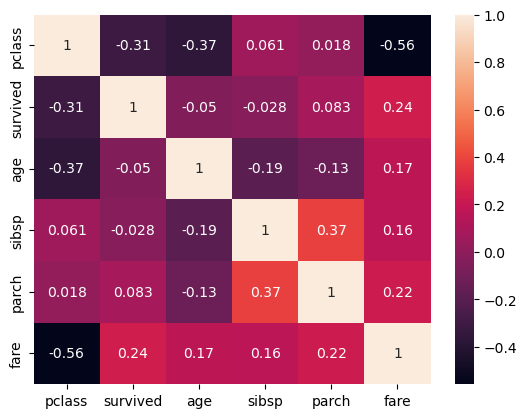

In [87]:
#. Farvetonerne og annoteringen hjælper med at identificere stærke og svage korrelationer samt retningen af korrelationen (positiv eller negativ).
sns.heatmap(corrmat, annot=True)
plt.show()

#### Social status

In [94]:
# Dette kan give dig indsigt i, hvordan gennemsnitsværdierne varierer mellem forskellige passagerklasser og hjælpe med at identificere mønstre eller forskelle i dataene.
# Vælg kun numeriske kolonner
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Grupper data efter 'pclass' og beregn gennemsnittet for numeriske kolonner
social = df.groupby('pclass')[numerical_columns].mean()

# Vis resultatet
social


,pclass,survived,age,sibsp,parch,fare
pclass,,,,,,
1,1.0,0.619195,38.039569,0.436533,0.365325,87.508992
2,2.0,0.429603,29.528333,0.393502,0.368231,21.179196
3,3.0,0.255289,26.302223,0.568406,0.400564,13.331087


<Axes: xlabel='pclass'>

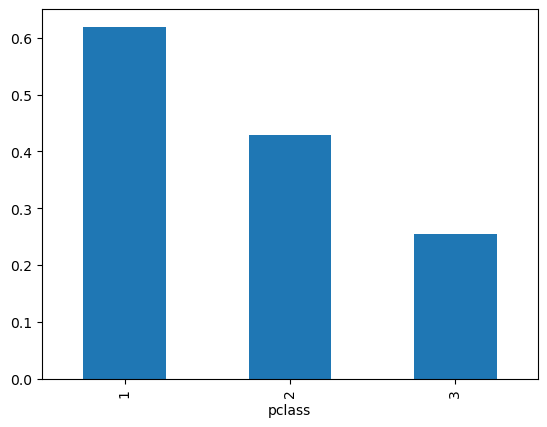

In [95]:
social['survived'].plot.bar()

## Further Exploration

#### Gender

In [98]:
# grupperer data efter køn ('sex') og beregner gennemsnittet for hver numerisk kolonne inden for hver kønsgruppe. 

# Vælg kun numeriske kolonner
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Grupper data efter 'sex' og beregn gennemsnittet for numeriske kolonner
gender = df.groupby('sex')[numerical_columns].mean()

# Vis resultatet
gender


,pclass,survived,age,sibsp,parch,fare
sex,,,,,,
female,2.154506,0.727468,28.886935,0.652361,0.633047,46.198097
male,2.372479,0.190985,30.430716,0.413998,0.247924,26.163072


<Axes: xlabel='sex'>

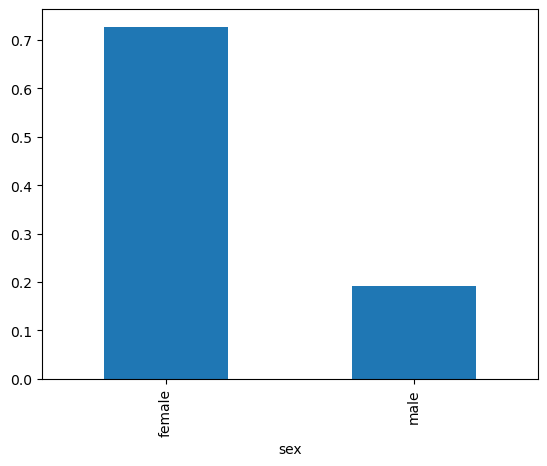

In [100]:
gender['survived'].plot.bar()

## Age

In [101]:
bins = [0,10,20,30,40,50,60,70,80] 
age=df.groupby([(pd.cut(df.age, bins))]).count()
age

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
age,,,,,,,,,,,
"(0, 10]",86,86,86,86,86,86,86,86,86,86,86
"(10, 20]",162,162,162,162,162,162,162,162,162,162,162
"(20, 30]",624,624,624,624,624,624,624,624,624,624,624
"(30, 40]",210,210,210,210,210,210,210,210,210,210,210
"(40, 50]",132,132,132,132,132,132,132,132,132,132,132
"(50, 60]",62,62,62,62,62,62,62,62,62,62,62
"(60, 70]",27,27,27,27,27,27,27,27,27,27,27
"(70, 80]",6,6,6,6,6,6,6,6,6,6,6


In [103]:
# beregner gennemsnittet for hver aldersgruppe og køn
age_by_gender = df.groupby([(pd.cut(df.age, bins)), 'sex']).mean(numeric_only=True)

age_by_gender

pclass  survived        age     sibsp     parch       fare
age      sex                                                                 
(0, 10]  female  2.682927  0.609756   4.355693  1.463415  1.439024  26.932924
         male    2.622222  0.555556   4.257407  1.933333  1.377778  31.716664
(10, 20] female  2.323529  0.735294  17.044118  0.602941  0.455882  33.923963
         male    2.670213  0.148936  17.457447  0.617021  0.351064  25.105453
(20, 30] female  2.357843  0.676471  27.072198  0.612745  0.490196  36.102473
         male    2.547619  0.164286  27.328595  0.285714  0.102381  19.081029
(30, 40] female  1.826667  0.813333  35.306667  0.493333  0.626667  64.832721
         male    2.266667  0.207407  35.018519  0.288889  0.296296  30.406387
(40, 50] female  1.739130  0.782609  45.782609  0.456522  0.913043  66.778717
         male    1.813953  0.186047  45.145349  0.337209  0.139535  36.810901
(50, 60] female  1.160000  0.920000  55.680000  0.640000  0.520000  89.606832
         male    1.540541  0.189189  54.851351  0.270270  0.270270  43.251803
(60, 70] female  1.333333  0.833333  63.166667  0.500000  0.500000  83.172217
         male    1.571429  0.047619  63.642857  0.285714  0.428571  59.698794
(70, 80] female  1.000000  1.000000  76.000000  1.000000  0.000000  78.850000
         male    1.800000  0.200000  73.300000  0.000000  0.000000  25.936680

<Axes: xlabel='age,sex'>

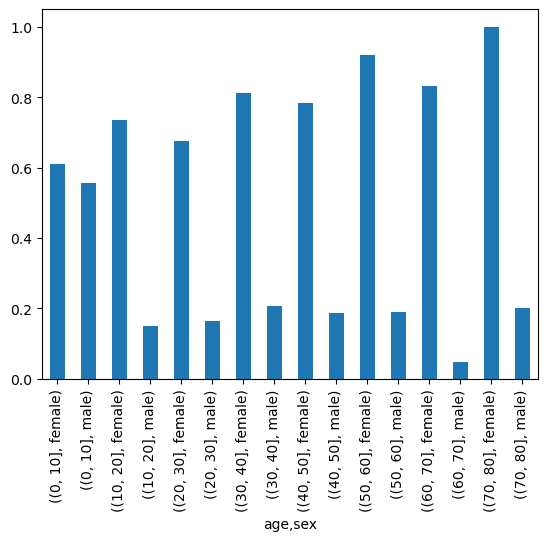

In [104]:
age_by_gender['survived'].plot.bar()

# Train a model
1. Split the data into input and output
2. Split the data into train and test sets

In [105]:
X = dfp.drop(['survived'], axis=1).values
y = dfp['survived'].values

In [106]:
X[-1]

array([ 3.   ,  1.   , 29.   ,  0.   ,  0.   ,  7.875,  2.   ])

In [107]:
y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [109]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=3)

In [110]:
dt.fit (X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [111]:
dt.score (X_test, y_test)

0.7977099236641222

In [112]:
import sklearn.ensemble as ske
rf = ske.RandomForestClassifier(n_estimators=50)
rf.fit (X_train, y_train)
rf.score (X_test, y_test)

0.7557251908396947

In [113]:
import sklearn.ensemble as ske
gb = ske.GradientBoostingClassifier(n_estimators=50)
gb.fit (X_train, y_train)
gb.score (X_test, y_test)

0.8129770992366412

In [114]:
# Try another method
import sklearn.ensemble as ske
# from utilities import visualize_classifier
eclf = ske.VotingClassifier([('dt', dt), ('rf', rf), ('gb', gb)])
eclf.fit (X_train, y_train)
eclf.score (X_test, y_test)

0.7977099236641222

In [115]:
# Test the classifier with the test input data
prediction = eclf.predict(X_test)
prediction

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [116]:
# Evaluate classifier performance
from sklearn.metrics import classification_report
class_names = ['Non-survival', 'Survival']
print("\n" + "#"*40)

print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, eclf.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, prediction, target_names=class_names))


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

Non-survival       0.86      0.95      0.90       652
    Survival       0.89      0.74      0.81       395

    accuracy                           0.87      1047
   macro avg       0.88      0.84      0.86      1047
weighted avg       0.87      0.87      0.87      1047

########################################


Classifier performance on test dataset

              precision    recall  f1-score   support

Non-survival       0.79      0.90      0.84       157
    Survival       0.81      0.65      0.72       105

    accuracy                           0.80       262
   macro avg       0.80      0.77      0.78       262
weighted avg       0.80      0.80      0.79       262



In [118]:
prediction = eclf.predict(X_test)
prediction

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [119]:
list(X_test)

[array([ 3.  ,  1.  , 39.  ,  0.  ,  0.  , 24.15,  2.  ]),
 array([ 3.        ,  0.        , 29.88113451,  1.        ,  0.        ,
        15.5       ,  1.        ]),
 array([ 3.  ,  1.  , 35.  ,  0.  ,  0.  ,  8.05,  2.  ]),
 array([ 2. ,  1. , 31. ,  0. ,  0. , 10.5,  2. ]),
 array([ 2.,  0.,  4.,  2.,  1., 39.,  2.]),
 array([ 3.    ,  1.    , 29.    ,  0.    ,  0.    ,  7.8542,  2.    ]),
 array([  1.    ,   1.    ,  17.    ,   0.    ,   2.    , 110.8833,
          0.    ]),
 array([  1.   ,   0.   ,  21.   ,   2.   ,   2.   , 262.375,   0.   ]),
 array([ 3.        ,  1.        , 29.88113451,  0.        ,  0.        ,
         7.8958    ,  2.        ]),
 array([ 3.   ,  1.   , 31.   ,  0.   ,  0.   ,  7.925,  2.   ]),
 array([ 3.        ,  1.        , 29.88113451,  0.        ,  0.        ,
         7.75      ,  1.        ]),
 array([ 3.  ,  1.  , 19.  ,  0.  ,  0.  ,  8.05,  2.  ]),
 array([ 1.  ,  1.  , 34.  ,  0.  ,  0.  , 26.55,  2.  ]),
 array([ 3. ,  0. , 47. ,  1. ,  0. , 14

In [120]:
# Enter a new data set for a person
my_set1 = ([[1,0,29.00,0,0,211.3375,0]])
# my_set2 = ([[3.    ,   1.    ,  29.    , 0,   0.    ,   7.875 ,   0.   ]])
# my_set3 = ([[3.    ,   1.    ,  29.    , 0,   0.    ,   7.875 ,   0.   ]])

In [121]:
prediction = eclf.predict(my_set1)
prediction

array([1], dtype=int64)